In [ ]:
import sys

if "google.colab" in sys.modules:
  !pip install eli5
  !pip install pandas-profiling==2.*
  !pip install pdpbox
  !pip install category_encoders==2.*
  !pip install --upgrade xgboost

import xgboost
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 216 kB 5.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 133 kB 35.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=373f8459407e0da5a589f9423c23991149a229720c144d19be3d0bbe3b576f54
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 69 kB 2.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 255.9 MB 34 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import f1_score
from pdpbox.pdp import pdp_isolate, pdp_plot

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures.csv


In [ ]:
df = pd.read_csv('SpotifyFeatures.csv')

In [ ]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les f√©es  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
df.shape

(232725, 18)

## *SECTION 2   PROJECT*
---
<br>

## üè¥ **ÌîÑÎ°úÏ†ùÌä∏ Íµ¨ÏÑ±**

- **Part 0. Opening**  
  0-1. Planning background <br>
  0-2. Data Description <br>

- **Part 1. EDA** <br>
  1-1. skipped steps <br>
  1-2. Data preprocessing <br>
  1-3. Dataset split

- **Part 2. Data Analysis**  <br>
  2-0. modeling<br>
  2-1. learning<br>
  2-2. validation<br>
  2-3. predictation

- **Part 3. Questions & Insight**<br>
  3-1. development planning

# **Part 0. Opening**

<img width='500' src='https://i.imgur.com/FVgYyRU.jpeg'>


## **0-1. Planning background**

ÏñºÎßàÏ†Ñ Í∏∏Í∞ÄÎçòÏ§ë Ïö∞Ïó∞Ìûà Ïû¨Ï¶àÌíçÏùò ÎßàÏùåÏóê ÎìúÎäî ÎÖ∏ÎûòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ Ïû•Î•¥ Í≤ÄÏÉâÏúºÎ°ú Îí§Ï†∏Î¥§ÎäîÎç∞ ÏïàÎÇòÏò§ÎçîÎùº. <br>
ÌïúÏ£º Îí§ Í∑∏ Í∞ÄÍ≤åÏïûÏóêÏÑú Í∞ôÏùÄ ÎÖ∏ÎûòÎ•º Îì£Í≥† Í∞ÄÏÇ¨Î°ú Í≤ÄÏÉâÌï¥Î¥§ÎçîÎãà <br>Î©úÎ°úÎîïÎû© ÏöîÏÜåÍ∞Ä Ï°∞Í∏à Îì§Ïñ¥Í∞ÄÏûàÎã§Í≥† Îû©Ïù¥ÎùºÍ≥† Î∂ÑÎ•òÌïòÎçîÎùº.
Ïù¥Í≤å ÎßêÏù¥ÎÇò ÎêòÎäîÍ±∞ÎÉêÍ≥†! <br>


ÏïÑÎ¨¥Ìäº, ÏùåÏïÖÏùò Ïû•Î•¥ÏôÄ Í∏∞Ï§ÄÏóê ÎåÄÌï¥ ÏùåÏïÖÏï†Ìò∏Í∞ÄÎùºÎ©¥ ÎàÑÍµ¨ÎÇò Í∞ñÎäî ÏùòÎ¨∏Ï†êÏùÑ Í∞ñÍ∏∞ ÎßàÎ†®Ïù¥Îã§. <br>
Ïã¨ÏßÄÏñ¥ ÌèâÎ°†Í∞ÄÎì§Ï°∞Ï∞® ÌïòÎÇòÏùò Í≥°Ïóê ÎåÄÌï¥ Î™ÖÌôïÌïòÍ≤å Í∞ôÏùÄ Ïû•Î•¥Î°ú Î∂ÑÎ•òÌïòÏßÄ Î™ªÌïúÎã§. <br>


ÏÇ¨Ïã§ ÏùåÏïÖÏ†Å Í¥ÄÏ†êÏóêÏÑú Î≥¥Î©¥ Ïó¨Îü¨Í∞ÄÏßÄ Ïù¥Ïú†Í∞Ä ÏûàÎã§.<br>
ÏÇ¨ÎûåÏùò Ïù∏ÏßÄ(Ï≤≠Í∞Å) ÏûêÏõêÏùÄ ÌïúÍ≥ÑÍ∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê **Îì£Í≥†Ïã∂ÏùÄ ÏùåÏïÖÏ†Å ÏöîÏÜåÏóê ÏßëÏ§ë**ÌïòÍ≤å ÎêúÎã§.<br>
Ïù¥ÎïåÎ¨∏Ïóê ÏÇ¨ÎûåÎßàÎã§ Í≥°Ï°∞Î•º <u>Îã§Î•¥Í≤å Îì£Í≥†, Îã§Î•¥Í≤å Ìï¥ÏÑù</u>ÌïòÍ≤å ÎêúÎã§.   <br> ÎòêÌïú, Í∞Å Ïû•Î•¥Í∞Ä Ïú†ÌñâÌïòÎçò ÏãúÎåÄÍ∞Ä ÏßÄÎÇòÍ∞êÏóê Îî∞Îùº **Í≤ΩÍ≥ÑÍ∞Ä Î™®Ìò∏**Ìï¥ÏßÄÎäî Î¨∏Ï†úÎèÑ ÏûàÎã§.<br>
ÎèÑÏ†ÑÏ†ÅÏù∏ ÏûëÍ≥°Í∞ÄÎì§Ïù¥ ÎßéÏùÄ <u>Ïû•Î•¥Îì§ÏùÑ ÏÑûÍ±∞ÎÇò Ïû¨Ìï¥ÏÑù</u>ÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.  <br>

Í≤∞Íµ≠ Ïû•Î•¥ÎùºÎäî Íµ¨Î∂ÑÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ ÏÑ∏Ïö∞Í≥† ÏÇ¨ÎûåÎì§Ïù¥ ÌåêÎã®ÌïòÍ∏∞Ïóê Î™®Ìò∏ÌïúÍ≤É ÏïÑÎãêÍπå? <br>
Ïù¥Îü∞ ÏÉùÍ∞ÅÏùÑ ÌïòÎçò ÎÇòÏóêÍ≤å, ÎßàÏπ® ÎëêÎã¨ ÎèôÏïà AIÏùò ÌûòÏùÑ ÎπåÎ†§ Î∂ÑÏÑùÌï¥Î≥º ÏßÄÏãùÏùÑ ÏåìÏùÑ Í∏∞ÌöåÍ∞Ä Ï£ºÏñ¥Ï°åÎã§! <br>
Í≥ºÏó∞ **AIÎäî Ïñ¥Îñ§ ÏùåÏïÖÏ†Å ÏöîÏÜåÏóê Îî∞Îùº Ïû•Î•¥Ïóê ÎåÄÌï¥ Î∂ÑÎ•ò** ÌïòÍ≥† Îçî ÎÇòÏïÑÍ∞Ä, ÎÇòÏóêÍ≤å **ÏùåÏïÖÏùÑ Ï∂îÏ≤ú**Ìï¥Ï§Ñ Ïàò ÏûàÏùÑÍπå?<br>



#  **‚ùå Notice in Advance ‚ùå**<br>
ÌÉÄÍ≤üÏù∏ Ïû•Î•¥(jenre) Ï†ïÎ≥¥Î•º Í∞ÅÏ¢Ö ÏùåÏõêÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÌÅ¨Î°§ÎßÅ Ìï¥ Ïò§Îäî Í≤ÉÎ∂ÄÌÑ∞ ÎßéÏùÄ ÏãúÌñâÏ∞©Ïò§Î•º Í≤™ÏóàÍ≥†, <br>
ÏùµÏàôÌïòÏßÄ ÏïäÏùÄ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏôÄ Í∑∏Ïóê ÎßûÎäî ÌôòÍ≤ΩÏùÑ Îã§Î£®Î©¥ÏÑú(vscode + anaconda ÌôòÍ≤ΩÍµ¨Ï∂ï, librosa library Îì±) <br> Ïàò ÎßéÏùÄ Ïò§Î•òÎ•º Ìï¥Í≤∞ÌïòÎäêÎùº Ïù¥ÌãÄÏù¥ ÎÑòÎäî ÏãúÍ∞ÑÏùÑ Ïì¥ ÌÉìÏóê ÌïòÎ£® ÎÇ®ÏßìÌïú ÏãúÍ∞ÑÏúºÎ°ú Í≤∞Í≥ºÎ•º ÎÇ¥Í∏∞ ÏúÑÌï¥ <br>Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏù¥ÎÇò ÌíàÏßàÏù¥ Îñ®Ïñ¥ÏßÄÎçîÎùºÎèÑ  ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú Í≤∞Ï†ï ÌñàÏäµÎãàÎã§.<br>

**Îç∞Ïù¥ÌÑ∞Îäî ÌÅ¨Î°§ÎßÅÏùÑ Î∞∞Ïö∞Í≥†, ÏΩîÎî©Ïã§Î†•ÏùÑ ÎäòÎ†§Í∞ÄÎ©¥ÏÑú Ï∞®ÌõÑ ÎäòÎ†§Í∞ÄÎäî Í≤ÉÏúºÎ°ú Î∞©Ìñ•ÏùÑ Ïû°Í≥†  <br>
Ïù¥Î≤àÏóêÎäî ÌïôÏäµÍ≥ºÏ†ïÏùÑ Î≥¥Ïù¥Í∏∞ ÏúÑÌïú ÌîÑÎ°úÏ†ùÌä∏Î°ú ÏÇºÍ≤†ÏäµÎãàÎã§.**<br>

*‚Äª ÏßÑÌñâÏ§ëÏù¥Îçò ÌîÑÎ°úÏ†ùÌä∏Îäî ÏÑúÎ∏åÎîîÎ†âÌÜ†Î¶¨Ïóê Ìè¨Ìï®ÏãúÏº∞ÏäµÎãàÎã§.*


## **0-2. Data Description**

`data source`<br>

https://www.kaggle.com/code/iqbalbasyar/spotify-genre-classification/data

`Features:` 

- genre = Í≥°Ïùò Ïû•Î•¥ (target)
- artist_name = ÏïÑÌã∞Ïä§Ìä∏Î™Ö
- track_name = Í≥°Î™Ö
- track_id = Í≥°Ïùò Í≥†Ïú†ÏãùÎ≥ÑÏΩîÎìú(spotify database Ï†ëÍ∑º ÌÇ§)
- popularity = Ïûò ÏïåÎ†§ÏßÑ ÎÖ∏ÎûòÏù∏ÏßÄ?
- acousticness = Ïñ¥Ïø†Ïä§Ìã±ÏÑ±Ìñ•(Ï†ÑÏûêÏùåÌñ•Ïù¥ Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ Ï†ïÎèÑ)
- danceability = Ï∂§Í≥º Ïñ¥Ïö∏Î¶¨Îäî Ï†ïÎèÑ(ÌÖúÌè¨, Î¶¨Îì¨ÏïàÏ†ïÏÑ±(ÌÖúÌè¨ Î≥ÄÌôîÍ∞Ä Ï†ÅÏùÄÏ†ïÎèÑ), ÎπÑÌä∏ Í∞ïÎèÑ(Î∞ïÏûêÏùò Ïù∏ÏßÄÏ†ïÎèÑ) Îì±Ïùò Î≥µÌï©Ï†ÅÏàòÏπò) 
- duration_ms = Ïû¨ÏÉùÏãúÍ∞Ñ(Îã®ÏúÑ:ms)
- energy = ÌôúÎèôÏ†Å ÏÑ±Ìñ•(ÏùåÎüâÎ≥ÄÌôî, Ï°∞ÏÑ±Î≥ÄÌôî, ÏÑ∏ÏÖòÏùò Ï∞∏Ïó¨ÎèÑ Îì±ÏúºÎ°ú ÏàòÏπòÌôîÎêú Ï±ÖÏ†ïÎêú Í≥°Ï°∞Ïùò ÏóêÎÑàÏßÄÌã± ÏÑ±Ìñ•)
- instrumentalness = Î≥¥Ïª¨Ïùò ÎπÑÏ§ë(ÏÑ∏ÏÖòÎåÄÎπÑ Î≥¥Ïª¨Ïùò ÏùåÎüâ / ÎØπÏã±Îã®Í≥ÑÏóêÏÑú ÏÑ§Ï†ïÌïú Î≥¥Ïª¨Ïùò ÏùåÎüâÎ∞∏Îü∞Ïä§)
- key = Ìä∏ÎûôÏùò Ï£ºÏÑ†Ïú® ÌîºÏπò(Ï°∞ÏÑ±ÌëúÍ∏∞Î≤ï). 
- liveness = ÎùºÏù¥Î∏åÏùåÏõêÏùº ÌôïÎ•†(ZCR, ÌïòÏö∏ÎßÅ, Í≥µÏßÑ(ÎÑìÏùÄÏä§ÌÖåÏù¥ÏßÄ), Í¥ÄÍ∞ùÏùò ÏÜåÎ¶¨ Îì±ÏùÑ ÏàòÏπòÌôî)
- loudness = ÏãúÎÅÑÎü¨Ïö¥ Ï†ïÎèÑ(Îç∞ÏãúÎπå(dB) Îã®ÏúÑÎ°ú Ï∏°Ï†ïÎêú Ï†ÑÏ≤¥Ìä∏ÎûôÏùò ÌèâÍ∑†ÏùåÎüâ)
- mode = Ï£ºÏÑ†Ïú®Ïùò Ï°∞ÏÑ±(Maj/min)
- speechiness = ÏùåÏÑ±Í∏∞Î∞ò ÏûêÏó∞Ïñ¥ Ïù∏Ïãù ÎπÑÏ§ë(ÎÜíÏùÑÏàòÎ°ù Î≥¥Ïª¨Ïùò Í≥µÎ∞±Ïù¥ ÏóÜÏùå, ÎÇÆÏùÑÏàòÎ°ù Í∏∞ÏïÖÏóê Í∞ÄÍπåÏõÄ)
- tempo = Í≥°Ïùò ÌÖúÌè¨(BPM)
- time_signature = ÏÜåÏ†àÎãπ ÎπÑÌä∏Ïàò(ex, 3/4Î∞ïÏûêÏùºÍ≤ΩÏö∞ 3Ìöå)
- valence = Í≥°Ï°∞Ïùò Î∞ùÏùå(Í∏çÏ†ïÏ†ÅÏù∏ Í∞êÏÑ±Ïùò Ï†ïÎèÑ)

In [ ]:
df[df.duplicated()] # Ï§ëÎ≥µÏóÜÏùå

Empty DataFrame
Columns: [genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

> **‚è≠ Result**<br>
Î∂ÑÏÑùÍ≤∞Í≥º Ï§ëÎ≥µÎêòÏßÄ ÏïäÏùÄ Ï¥ù <U>**232725Í∞ú**</U> TitleÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î°ú,<br>
Ï¥àÍ∏∞ Î™©ÌëúÎ°ú ÌñàÎçò Í∞ÅÏ¢Ö ÏùåÌñ• Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÍ≥†, <br> Ï∂úÏ≤òÏôÄ ÏÇ∞Ï∂úÍ∏∞Ï§ÄÏù¥ Î∂àÎ∂ÑÎ™ÖÌïú ÌäπÏÑ±(danceability, energy, valence Îì±)Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ÏûàÏúºÎÇò, <br> Îç∞Ïù¥ÌÑ∞Ïùò Ï∂úÏ≤ò(kaggleÏù¥ÎÇò, ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞Îäî spotify Ï†úÍ≥µ)Í∞Ä Ïã†Î¢∞Ìï† Ïàò ÏûàÍ≥†, <br>
Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ TargetÏù∏ 'Ïû•Î•¥'Ïóê ÎåÄÌï¥ Îã§Î£®Í≥† ÏûàÏúºÎ©∞, ÌÉÄÍ≤üÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏúºÎ©∞<br>
Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Ïùò ÏñëÏù¥ ÎßéÏïÑÏÑú Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌï¥ÎÇº Ïàò ÏûàÏùÑÍ≤ÉÏúºÎ°ú ÌåêÎã®Ìï®. <br>

# **Part 1. EDA**


## **1-1. skipped steps**
> ‚ö†Ô∏è***Missing value handling*** <br>
> ‚ö†Ô∏è***Feature Engineering*** <br>
         

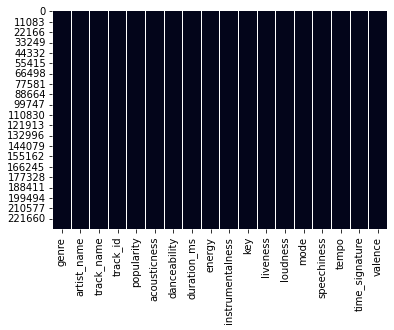

In [ ]:
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False) #Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî = Í≤∞Ï∏°Ïπò ÏóÜÏùå

> **üí° why skipped?**  
> - **Missing value handling** <br>
‚Üí ÎåÄÌòï ÎØ∏ÎîîÏñ¥ ÏÑúÎπÑÏä§ ÌöåÏÇ¨Ïù∏ spotifyÏóêÏÑú Î¨¥Í≤∞ÏÑ± ÌôïÏù∏ÌõÑ Í∞úÎ∞úÏûêÌôòÍ≤ΩÏùÑ ÌÜµÌï¥ Ï†úÍ≥µ .<br>
> - **Feature Engineering** <br>
‚Üí ÌäπÏÑ±Îì§Ïù¥ ÎåÄÎ∂ÄÎ∂Ñ Ï∂îÏÉÅÏ†Å( *1) Ïù¥Í±∞ÎÇò, ÏÇ∞Ï∂úÍ≥µÏãùÏù¥ÎÇò Í∏∞Ï§ÄÏùÑ Ïïå Ïàò ÏóÜÎäî Î≥µÌï©Ï†Å( *2)Ïù∏ ÏàòÏπòÏù¥ÎØÄÎ°ú <br>
ÌäπÏÑ±Í∞Ñ Ïó∞ÏÇ∞ÏùÑ ÌÜµÌï¥ ÏÑ§Î™ÖÎ†•Ïùò ÏÜêÏã§Ïù¥ÎÇò, ÌäπÏÑ±Ï§ëÏöîÎèÑÍ∞Ä Í∞êÏÜåÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§Í≥† ÌåêÎã®Ìï¥ÏÑú Í±¥ÎÑàÎúÄ.<br>
  *1) danceability, energy, valence<br>
  *2) popularity, instrumentalness, liveness, speechiness<br>

## **1-2. Data preprocessing**
> ‚ö†Ô∏è***Î™®Îç∏Ïóê ÌïôÏäµÏãúÌÇ§Í∏∞ Ï†Ñ Ï∞©ÏïàÏÇ¨Ìï≠Ïóê Ï§ëÏ†êÏùÑ ÎëêÍ≥† ÌåêÎã®Ìï®.***

In [ ]:
df.head(5)

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les f√©es  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
df.genre.value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children‚Äôs Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

> **üí° Decision**  
> - **ÏùºÎ∂Ä Ïû•Î•¥ Ï†úÏô∏** <br>
‚Üí Ïû•Î•¥(target)Ïùò Í∞ØÏàòÍ∞Ä ÎßéÏúºÎ©¥ Î∂ÑÎ•ò Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ïßà Í≤ÉÏúºÎ°ú ÏòàÏÉÅ <br>
‚Üí Ïû•Î•¥Ïùò ÎåÄÌëúÏÑ±Ïù¥ Î™®Ìò∏ÌïòÍ±∞ÎÇò ÏÑ§Î™ÖÎ†•Ïù¥ Î∂ÄÏ°±Ìïú ÏùºÎ∂Ä Ïû•Î•¥ Ï†úÏô∏<br>

> **‚ùå Drop data**  
> - **Ï¢ÖÌï©ÎØ∏ÎîîÏñ¥Ïû•Î•¥** <U>‚Äª ÏùåÏïÖÏÑ±Ïù¥ Îã§ÏñëÌïú Ï¢ÖÏÜçÏ†Å Ïû•Î•¥</U> <br>
  - Soundtrack <br>
  - Anime<br>
  - Movie
> - **Î°úÏª¨ÏùåÏïÖ** <U>‚Äª Îã§ÏñëÌïú ÎÇòÎùºÏùò ÏùåÏïÖÏù¥Îùº ÌäπÏÑ±Ïù¥ Ï†ïÌòïÌôîÎêòÍ∏∞ ÌûòÎì¨</U>
  - World 

> **‚≠ï Hold**  
> - **ÌååÏÉùÏû•Î•¥** <U>‚ÄªÍ¥ÄÍ≥Ñ Ïú†ÏÇ¨ÏÑ± ÎÜíÏßÄÎßå Î≥¥Î•ò</U> <br>
  - Alternative - Rock <br>
  - reggaeton - Reggae<br>


In [ ]:
other_genre = df[(df['genre'] == 'Soundtrack') | (df['genre'] == 'Anime') | (df['genre'] == 'Movie') | (df['genre'] == 'World') ]
other_genre.shape # ÏÇ¨Ïö¥ÎìúÌä∏Îûô, Ïï†ÎãàÎ©îÏù¥ÏÖò, ÏòÅÌôî, ÏÑ∏Í≥ÑÎ°úÏª¨ÏùåÏïÖ

(35484, 18)

In [ ]:
df = df.drop(other_genre.index)

In [ ]:
len(df.genre.unique()) # Ïû•Î•¥ Í∞ØÏàò

23

In [ ]:
df.genre.value_counts() # Ïû•Î•¥Î≥Ñ Í≥° Ïàò

Comedy              9681
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children‚Äôs Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
Soul                9089
Blues               9023
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [ ]:
df.shape[0]

197241

> **‚è≠ Result**<br>
Ïû•Î•¥ Í∞ØÏàòÎäî ÎßéÏúºÎÇò, Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎèÑ <U>197241Í∞ú</U> Ïù¥ÎØÄÎ°ú Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê®

In [ ]:
df.track_id.value_counts() # track_idÍ∞Ä Í≥°Ïùò Í≥†Ïú†Î≤àÌò∏Ïù∏Îç∞ Ï§ëÎ≥µÍ∞íÏù¥ Ïó¨Îü¨Í∞ú ÎÇòÏò¥.

0wY9rA9fJkuESyYm9uzVK5    8
6AIte2Iej1QKlaofpjCzW1    8
0UE0RhnRaEYsiYgXpyLoZc    8
3R73Y7X53MIQZWnKloWq5i    8
3uSSjnDMmoyERaAK9KvpJR    8
                         ..
6wJrqTE6c4NtfDqAcSRcBf    1
0INehbMZOFPnaPBAjK97i3    1
2A4vCndSkZ3jd5nfh3a8gc    1
0uH6JssU7mWkTT9mqeqEvL    1
34XO9RwPMKjbvRry54QzWn    1
Name: track_id, Length: 143741, dtype: int64

In [ ]:
df[df.track_id == '0wY9rA9fJkuESyYm9uzVK5'] # 8Í∞ú Ï§ëÎ≥µÏù∏ Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÎ•º ÎåÄÌëúÎ°ú Ï°∞ÌöåÌï®

genre artist_name track_name                track_id  \
1804         Alternative         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
68204            Hip-Hop         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
77892   Children‚Äôs Music         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
93893              Indie         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
115551               Rap         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
149893               Pop         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
152677               R&B         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   
192273              Soul         SiR    D'Evils  0wY9rA9fJkuESyYm9uzVK5   

        popularity  acousticness  danceability  duration_ms  energy  \
1804            63       0.00558         0.784       171818   0.586   
68204           67       0.00558         0.784       171818   0.586   
77892           66       0.00558         0.784       171818   0.586   
93893           67       0.00558         0.784       171818   0.586   
115551          67       0.00558         0.784       171818   0.586   
149893          67       0.00558         0.784       171818   0.586   
152677          67       0.00558         0.784       171818   0.586   
192273          67       0.00558         0.784       171818   0.586   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
1804            0.000286  C#     0.106    -3.417  Major        0.187  132.169   
68204           0.000286  C#     0.106    -3.417  Major        0.187  132.169   
77892           0.000286  C#     0.106    -3.417  Major        0.187  132.169   
93893           0.000286  C#     0.106    -3.417  Major        0.187  132.169   
115551          0.000286  C#     0.106    -3.417  Major        0.187  132.169   
149893          0.000286  C#     0.106    -3.417  Major        0.187  132.169   
152677          0.000286  C#     0.106    -3.417  Major        0.187  132.169   
192273          0.000286  C#     0.106    -3.417  Major        0.187  132.169   

       time_signature  valence  
1804              4/4    0.656  
68204             4/4    0.656  
77892             4/4    0.656  
93893             4/4    0.656  
115551            4/4    0.656  
149893            4/4    0.656  
152677            4/4    0.656  
192273            4/4    0.656

> **üí° Decision**  
> - **Ï§ëÎ≥µÎêú track_idÎ•º Í∞ñÎäî Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú** <br>
‚Üí ÏÇ¥Ìé¥Î≥∏ Í≤∞Í≥º, genreÏôÄ popularityÎ•º Ï†úÏô∏Ìïú Î™®Îì†ÏöîÏÜåÍ∞Ä Í∞ôÏùå. Ï¶â, Í∞ôÏùÄ Í≥°ÏûÑ. <br>
‚Üí Ïó¨Îü¨ Ïû•Î•¥Ïóê Ìï¥ÎãπÌïòÎäî(Mixed genre) Í≥°Ïù¥Í±∞ÎÇò, Ï†úÎåÄÎ°ú Î∂ÑÎ•òÍ∞Ä ÎêòÏßÄ ÏïäÏùÄ Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞, ÎëòÏ§ë ÌïòÎÇòÏûÑ. <br>
    (ÏïåÌÑ∞ÎùΩ+ÌûôÌï©+ÎèôÏöî+ÏÜåÏö∏? = ÎßêÎèÑÏïàÎèº!)<br>

In [ ]:
track_id_all = df.track_id.value_counts()
track_id_duplicated = track_id_all[~track_id_all.isin([1])]
track_id_duplicated # 

0wY9rA9fJkuESyYm9uzVK5    8
6AIte2Iej1QKlaofpjCzW1    8
0UE0RhnRaEYsiYgXpyLoZc    8
3R73Y7X53MIQZWnKloWq5i    8
3uSSjnDMmoyERaAK9KvpJR    8
                         ..
7ef4DlsgrMEH11cDZd32M6    2
7l94dyN2hX9c6wWcZQuOGJ    2
0cSNN4fgW1RFDQV58eVRKK    2
5h9qCxrIrS7atH6OEglH8X    2
04ZTP5KsCypmtCmQg5tH9R    2
Name: track_id, Length: 33166, dtype: int64

In [ ]:
df[df['track_id'].isin(list(track_id_duplicated.index))] # ÎëêÍ∞úÏù¥ÏÉÅÏùò targetÏùÑ Í∞ÄÏßÄÎäî mixed target data

genre     artist_name  \
135      R&B   Mary J. Blige   
136      R&B         Rihanna   
137      R&B       Yung Bleu   
138      R&B        Surfaces   
139      R&B  Olivia O'Brien   
...      ...             ...   
232715  Soul      Emily King   
232718  Soul    Muddy Waters   
232720  Soul           Slave   
232722  Soul    Muddy Waters   
232723  Soul         R.LUM.R   

                                               track_name  \
135                            Be Without You - Kendu Mix   
136                                             Desperado   
137            Ice On My Baby (feat. Kevin Gates) - Remix   
138                             Heaven Falls / Fall on Me   
139                                           Love Myself   
...                                                   ...   
232715                                               Down   
232718  I Just Want To Make Love To You - Electric Mud...   
232720                                       Son Of Slide   
232722                     (I'm Your) Hoochie Coochie Man   
232723                                      With My Words   

                      track_id  popularity  acousticness  danceability  \
135     2YegxR5As7BeQuVp2U6pek          65       0.08300         0.724   
136     6KFaHC9G178beAp7P0Vi5S          63       0.32300         0.685   
137     6muW8cSjJ3rusKJ0vH5olw          62       0.06750         0.762   
138     7yHqOZfsXYlicyoMt62yC6          61       0.36000         0.563   
139     4XzgjxGKqULifVf7mnDIQK          68       0.59600         0.653   
...                        ...         ...           ...           ...   
232715  5cA0vB8c9FMOVDWyJHgf26          42       0.55000         0.394   
232718  2HFczeynfKGiM9KF2z2K7K          43       0.01360         0.294   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
135          246333   0.689          0.000000   D    0.3040    -5.922  Minor   
136          186467   0.610          0.000000   C    0.1020    -5.221  Minor   
137          199520   0.520          0.000004   F    0.1140    -5.237  Minor   
138          240597   0.366          0.002430   B    0.0955    -6.896  Minor   
139          213947   0.621          0.000000   B    0.0811    -5.721  Minor   
...             ...     ...               ...  ..       ...       ...    ...   
232715       281853   0.346          0.000002   E    0.1290   -13.617  Major   
232718       258267   0.739          0.004820   C    0.1380    -7.167  Major   
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   

        speechiness    tempo time_signature  valence  
135          0.1350  146.496            4/4   0.6930  
136          0.0439   94.384            3/4   0.3230  
137          0.0959   75.047            4/4   0.0862  
138          0.1210   85.352            4/4   0.7680  
139          0.0409  100.006            4/4   0.4660  
...             ...      ...            ...      ...  
232715       0.0635   90.831            4/4   0.4360  
232718       0.0434  176.402            4/4   0.9450  
232720       0.0316  115.542            4/4   0.9620  
232722       0.1480   84.135            4/4   0.8130  
232723       0.1460  100.031            4/4   0.4890  

[86666 rows x 18 columns]

In [ ]:
df[~df['track_id'].isin(list(track_id_duplicated.index))] # ÌïòÎÇòÏùò targetÎßåÏùÑ Í∞ÄÏßÄÎäî single-target data

genre               artist_name  \
552     A Capella            MC6 A Cappella   
553     A Capella     The Singers Unlimited   
554     A Capella            MC6 A Cappella   
555     A Capella            MC6 A Cappella   
556     A Capella                      Glad   
...           ...                       ...   
232716       Soul               John Legend   
232717       Soul                     Belly   
232719       Soul        Bobby "Blue" Bland   
232721       Soul  Jr Thomas & The Volcanos   
232724       Soul            Mint Condition   

                                    track_name                track_id  \
552                       For the Longest Time  0PuWvFJqZPJAxZNrFgw8xL   
553                                      Clair  1iXJKuzDH0E6PnTk2lQXAq   
554                            Come Go With Me  3XxwdU13609bTGaAFRg3PA   
555                    The Lion Sleeps Tonight  0crWDkAajRTnsGuZ6CAU85   
556                    A Debtor to Mercy Alone  6TK4I15u1oym5H2eETng4F   
...                                        ...                     ...   
232716                  Quickly (feat. Brandy)  1U0OMWvR89Cm20vCNar50f   
232717                                  P.O.P.  2gGqKJWfWbToha2YmDxnnj   
232719  I'll Take Care Of You - Single Version  2iZf3EUedz9MPqbAvXdpdA   
232721                            Burning Fire  1qWZdkBl4UVPj9lK6HuuFM   
232724          You Don't Have To Hurt No More  34XO9RwPMKjbvRry54QzWn   

        popularity  acousticness  danceability  duration_ms  energy  \
552             44        0.7800         0.616       223813   0.298   
553             33        0.9730         0.484       154200   0.222   
554             25        0.8020         0.717       137800   0.518   
555             26        0.3020         0.691       183920   0.490   
556             24        0.5990         0.389       181267   0.153   
...            ...           ...           ...          ...     ...   
232716          39        0.2310         0.736       222667   0.701   
232717          43        0.1040         0.802       201173   0.516   
232719          32        0.5660         0.423       144667   0.337   
232721          38        0.0329         0.785       282447   0.683   
232724          35        0.0973         0.758       323027   0.470   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
552             0.000000   D    0.0973    -7.712  Major       0.0274   82.471   
553             0.000306   F    0.1040   -14.631  Minor       0.0440  127.689   
554             0.000000  G#    0.0940    -7.754  Major       0.0883  129.878   
555             0.000006   F    0.2290   -11.222  Major       0.0743  107.066   
556             0.000000   E    0.0902   -12.023  Major       0.0430  120.626   
...                  ...  ..       ...       ...    ...          ...      ...   
232716          0.000000  A#    0.2030    -4.345  Minor       0.1000   99.991   
232717          0.000485   D    0.1050    -9.014  Major       0.2130  175.666   
232719          0.000000  A#    0.2760   -13.092  Minor       0.0436   80.023   
232721          0.000880   E    0.2370    -6.944  Minor       0.0337  113.830   
232724          0.000049  G#    0.0836    -6.708  Minor       0.0287  113.897   

       time_signature  valence  
552               4/4    0.712  
553               4/4    0.409  
554               4/4    0.672  
555               4/4    0.664  
556               4/4    0.236  
...               ...      ...  
232716            4/4    0.770  
232717            4/4    0.482  
232719            4/4    0.497  
232721            4/4    0.969  
232724            4/4    0.479  

[110575 rows x 18 columns]

In [ ]:
mtdf = df[df['track_id'].isin(list(track_id_duplicated.index))] # mtdf = mixed target Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
stdf = df[~df['track_id'].isin(list(track_id_duplicated.index))] # stdf = single target Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
print(' mtdf:',mtdf.shape,'\n','stdf:',stdf.shape)

 mtdf: (86666, 18) 
 stdf: (110575, 18)


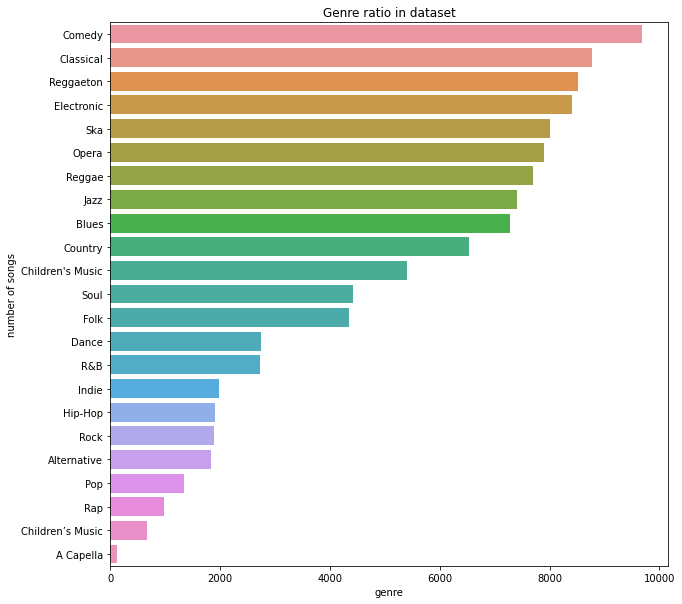

In [ ]:
stdf.genre.value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=stdf.genre.value_counts().values, y=stdf.genre.value_counts().index)
plt.title('Genre ratio in dataset')
plt.xlabel('genre')
plt.ylabel('number of songs')
plt.show()

> **‚è≠ Result**<br>
ÏùºÎ∂Ä Ïû•Î•¥Î•º Ï†úÍ±∞ÌïòÍ≥†,  Îã§Ï§ëÌÉÄÍ≤üÍ∞íÏùÑ Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÍ≥† ÎÇú Îí§ ÏñªÏñ¥ÏßÑ<br>
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ stdfÎäî ÌïòÎÇòÏùò Ïû•Î•¥ÎßåÏùÑ Í∞ÄÏßÄÎäî ÎåÄÏã† classweightÍ∞Ä Í∑†Ìòï ÏûàÏßÄÎäî ÏïäÏùå.<br>

>ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎåÄÏ§ëÏóêÍ≤å ÏùµÏàôÌïú Ïû•Î•¥Îì§Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ÑÏñ¥Îì§ÏóàÏùå<br>
  ‚Üí ÎåÄÏ§ëÏóêÍ≤å ÏùµÏàôÌïú Ïû•Î•¥Í∞Ä Mixed genreÏóê Ìè¨Ìï®ÎêòÍ∏∞ Ïâ¨ÏõÄ<br>
  ‚Üí ÎåÄÎ∂ÄÎ∂Ñ ÏùµÏàôÌïú Ïû•Î•¥Î•º Î≤†Ïù¥Ïä§Î°ú ÎØπÏä§ÎêòÎäîÍ≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå.

> **üí° Decision**  
> - **ÏùåÏïÖÏ†Å ÏöîÏÜåÏôÄ Í¥ÄÍ≥ÑÏóÜÎäî ÌäπÏÑ± drop** <br>
‚Üí 'artist_name', 'track_name', 'popularity', 'duration_ms', 'track_id'

In [ ]:
st_data = stdf.drop(columns = ['artist_name', 'track_name', 'popularity', 'duration_ms', 'track_id'])

In [ ]:
mt_data = mtdf.drop(columns = ['artist_name', 'track_name', 'popularity', 'duration_ms', 'track_id'])

In [ ]:
st_data.describe().T

count        mean        std        min      25%  \
acousticness      110575.0    0.418313   0.371067   0.000001   0.0510   
danceability      110575.0    0.558912   0.185200   0.058200   0.4360   
energy            110575.0    0.569302   0.277954   0.000020   0.3600   
instrumentalness  110575.0    0.152781   0.302889   0.000000   0.0000   
liveness          110575.0    0.244027   0.232637   0.010200   0.0977   
loudness          110575.0  -10.198014   6.404749 -47.599000 -12.9190   
speechiness       110575.0    0.153949   0.242132   0.022200   0.0385   
tempo             110575.0  116.629672  31.430930  32.451000  91.6270   
valence           110575.0    0.482555   0.267290   0.000000   0.2590   

                         50%       75%      max  
acousticness        0.308000    0.8140    0.996  
danceability        0.576000    0.6980    0.989  
energy              0.615000    0.8040    0.999  
instrumentalness    0.000065    0.0546    0.997  
liveness            0.135000    0.3050    1.000  
loudness           -8.251000   -5.6650    3.744  
speechiness         0.053600    0.1210    0.967  
tempo             113.408000  137.8610  242.903  
valence             0.483000    0.7020    1.000

> **üí° Decision**  
> - **Normalization** <br>
‚Üí loudness, tempo Îëê ÌäπÏÑ±ÏùÑ Ï†úÏô∏ÌïòÎ©¥ ÏùºÎ∞òÌôî ÎêòÏñ¥ÏûàÏùå.<br>
> - **MinMaxScaler** <br>
‚Üí ÏÉÅÍ∏∞Ìïú Îëê ÌäπÏÑ±Í≥º ÎÇòÎ®∏ÏßÄ ÌäπÏÑ±Ïùò Ïä§ÏºÄÏùºÏùò Ï∞®Ïù¥Îäî ÌÅº<br>
‚Üí ÌÖúÌè¨Îäî ÏãúÎ∂ÑÌï†Îêú ÏàòÏπòÏù¥ÎØÄÎ°ú Î∂ÑÌè¨ÏôÄ ÏïÑÏ£º ÎØºÍ∞êÌïú Í¥ÄÍ≥ÑÏûÑ. Ï¶â Î∂ÑÌè¨Ïóê Î≥ÄÎèôÏù¥ ÏÉùÍ∏∞ÏßÄ ÏïäÎäî MinMaxScaler ÏÇ¨Ïö© <br>
‚Üí Ìï©Î¶¨Ï†ÅÏù∏ Î≤îÏúÑ ÎÇ¥Ïùò tempo Í∞íÏúºÎ°ú, Ïù¥ÏÉÅÏπòÍ∞Ä ÏóÜÏúºÎØÄÎ°ú Ïù¥ÏÉÅÏπòÏóêÎäî ÎØºÍ∞êÌïú minmaxscalerÎèÑ ÏÇ¨Ïö©Í∞ÄÎä•



> **‚è≠ EDA Result**<br>
Multiclass ClassificationÏúºÎ°ú Ìï¥Í≤∞Ìï¥ÏïºÌï®(Îã§Ï§ëÎ∂ÑÎ•òÎ¨∏Ï†ú)<br>
MinMaxScalerÎ°ú ÌäπÏÑ±Í∞Ñ scale Ï∞®Ïù¥Ïóê ÏòÅÌñ•Î∞õÏßÄÏïäÍ≤å Ìï®<br>
Tree basedÏù∏ XGBoostÎ°ú ÌïôÏäµÏãúÌÇ¥(multi:softmax)

## **1-3. Dataset split**
> ‚ö†Ô∏è***Ïû•Î•¥Í∞Ä ÌïòÎÇòÏù∏ st_dataÎ°ú ÌïôÏäµ.***<br>
> ‚ö†Ô∏è***ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨.***

In [ ]:
target = "genre"

In [ ]:
X = st_data[st_data.columns.difference([target], sort = False)]
y = st_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(88460, 12) (88460,)
(22115, 12) (22115,)


# **Part 2. Data Analysis**

<img width='500' src='https://www.enerdata.co.kr/sites/default/files/images/market-analysis.jpg'>


## **2-0. Modeling**


> **üí° Decision**  
> - **Model - XGBoost** <br>
ÌÉÄÍ≤üÏùò Ï¢ÖÎ•òÍ∞Ä ÎßéÏïÑÏÑú Îã§Ï§ëÎ∂ÑÎ•òÎ¨∏Ï†úÎ°ú ÌíÄÏñ¥Ïïº Ìï®(multi:softmax) <br>

> - **target/sample unbalance** <br>
ÌÉÄÍ≤üÏùò ÏÉòÌîåÍ∞ØÏàòÍ∞Ä Î∂àÍ∑†ÌòïÌï¥ÏÑú Í∞ÄÏ§ëÏπòÎ•º Ï§å
 - sample_weight
 - class_weight

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train.values
)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88460 entries, 49093 to 39479
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      88460 non-null  float64
 1   danceability      88460 non-null  float64
 2   energy            88460 non-null  float64
 3   instrumentalness  88460 non-null  float64
 4   key               88460 non-null  object 
 5   liveness          88460 non-null  float64
 6   loudness          88460 non-null  float64
 7   mode              88460 non-null  object 
 8   speechiness       88460 non-null  float64
 9   tempo             88460 non-null  float64
 10  time_signature    88460 non-null  object 
 11  valence           88460 non-null  float64
dtypes: float64(9), object(3)
memory usage: 8.8+ MB


In [ ]:
params = {'xgbclassifier__min_child_weight': [16, 18, 20],
          'xgbclassifier__gamma': [3, 4, 5],
          'xgbclassifier__max_depth': [4, 5, 6, 7]} 

pipeline = make_pipeline(
    OrdinalEncoder(),
    MinMaxScaler(),
    XGBClassifier(
        objective='multi:softmax',
        n_estimators=40,
        random_state=42,
        learning_rate=0.2,
        eval_metric = 'merror', 
        n_jobs=10,
        class_weight=classes_weights,
        use_label_encoder=False)
    )


clf = RandomizedSearchCV(
    pipeline,
    param_distributions=params,
    scoring='f1_micro', 
    n_iter = 5,
    cv = 5,
    verbose=3,
    n_jobs =-1,
    random_state=42
    )

In [ ]:
y_train.head(20)

49093          Blues
24961     Electronic
57015            R&B
111627           Pop
85157            R&B
23941     Electronic
157827           Ska
132017        Reggae
107172         Opera
160426     Reggaeton
132010        Reggae
139018     Reggaeton
164806     Reggaeton
44078           Folk
215704       Country
52644          Blues
23713     Electronic
130493     Classical
231920          Soul
157678           Ska
Name: genre, dtype: object

In [ ]:
labelencoder = LabelEncoder()
y_train_enc = labelencoder.fit_transform(y_train)
y_test_enc = labelencoder.transform(y_test)
labelencodermap = list(labelencoder.inverse_transform(list(range(23))))

> - **ÌÉÄÍ≤üÏóê ÎåÄÌï¥ ÎùºÎ≤® Ïù∏ÏΩîÎî©** <br>
‚Üí XGBÏùò Îã§Ï§ëÎ†àÏù¥Î∏î Ï†ëÍ∑ºÏùÄ 0Î∂ÄÌÑ∞ ÌÅ¥ÎûòÏä§ Í∞ØÏàò -1Í∞ú ÍπåÏßÄÏùò Ï†ïÏàòÏûÑ<br>
‚Üí dance : 1 / rnb : 2 / ballad : 3 / pop : 4 / hiphop : 5 / rock : 6 

## **2-1. Learning**
> ‚ö†Ô∏è***RandomizedSearchCVÎ•º ÌÜµÌï¥ ÏµúÏ†ÅÏùò HPÏÉùÏÑ±***

In [ ]:
clf.fit(X_train, y_train_enc)
print("Optimal Hyperparameter:", clf.best_params_)
print("f1_micro:", clf.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[06:03:20] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Optimal Hyperparameter: {'xgbclassifier__min_child_weight': 20, 'xgbclassifier__max_depth': 7, 'xgbclassifier__gamma': 5}
f1_micro: 0.5096879945738186


In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

0  \
mean_fit_time                                                                 187.740659   
std_fit_time                                                                    1.051808   
mean_score_time                                                                 0.704078   
std_score_time                                                                  0.139803   
param_xgbclassifier__min_child_weight                                                 20   
param_xgbclassifier__max_depth                                                         7   
param_xgbclassifier__gamma                                                             5   
params                                 {'xgbclassifier__min_child_weight': 20, 'xgbcl...   
split0_test_score                                                               0.508931   
split1_test_score                                                               0.511135   
split2_test_score                                                               0.506444   
split3_test_score                                                               0.506331   
split4_test_score                                                                 0.5156   
mean_test_score                                                                 0.509688   
std_test_score                                                                  0.003447   
rank_test_score                                                                        1   

                                                                                       3  \
mean_fit_time                                                                 159.346715   
std_fit_time                                                                    1.710721   
mean_score_time                                                                 0.693975   
std_score_time                                                                  0.035714   
param_xgbclassifier__min_child_weight                                                 16   
param_xgbclassifier__max_depth                                                         6   
param_xgbclassifier__gamma                                                             5   
params                                 {'xgbclassifier__min_child_weight': 16, 'xgbcl...   
split0_test_score                                                               0.505087   
split1_test_score                                                               0.508083   
split2_test_score                                                               0.505031   
split3_test_score                                                               0.504804   
split4_test_score                                                               0.509722   
mean_test_score                                                                 0.506545   
std_test_score                                                                  0.001995   
rank_test_score                                                                        2   

                                                                                       4  \
mean_fit_time                                                                 129.189526   
std_fit_time                                                                    0.718452   
mean_score_time                                                                 0.664747   
std_score_time                                                                  0.295796   
param_xgbclassifier__min_child_weight                                                 18   
param_xgbclassifier__max_depth                                                         5   
param_xgbclassifier__gamma                                                             4   
params                                 {'xgbclassifier__min_child_weight': 18, 'xgbcl...   
split0_test_score                                                               0.503504   
split1_test_score                    

In [ ]:
model = clf.best_estimator_ # ÏµúÏ†ÅÏùò paramÏùÑ Í∞ÄÏßÄÎäî Î™®Îç∏

In [ ]:
model.fit(X_train, y_train_enc)

[06:56:08] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['key', 'mode', 'time_signature'],
                                mapping=[{'col': 'key', 'data_type': dtype('O'),
                                          'mapping': B       1
G#      2
F       3
E       4
G       5
D       6
F#      7
C       8
A       9
C#     10
A#     11
D#     12
NaN    -2
dtype: int64},
                                         {'col': 'mode',
                                          'data_type': dtype('O'),
                                          'mapping': Major    1
Minor    2
NaN     -2
dtype: int64},
                                         {'col': 'time_signature',
                                          'data_type': dtype('O'),
                                          'mapping': 4/4    1
3/4    2
1/4    3
5/4    4
0/4    5
NaN   -2...
                               gamma=5, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_cons

In [ ]:
baseline = pd.Series(y_train).mode()
y_pred_base = [baseline] * len(y_train)
print('Í∏∞Ï§ÄÎ™®Îç∏ score: {}'.format(round(f1_score(y_train, y_pred_base, average = 'micro'),2)))

Í∏∞Ï§ÄÎ™®Îç∏ score: 0.09


> **‚è≠ EDA Result**<br>
Í∏∞Ï§ÄÎ™®Îç∏(0.09)Ïóê ÎπÑÌï¥ XGBoost(0.51)ÎÜíÍ∏¥ ÌïòÏßÄÎßå, Ï∞®Ïù¥Í∞Ä ÎÑàÎ¨¥ ÌÅ∞ Í≤É Í∞ôÏùå. <br>
23Í∞úÏùò Î©ÄÌã∞ÌÅ¥ÎûòÏä§Î•º Î∂ÑÎ•ò Í∏∞Ï§ÄÎ™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÏµúÎπàÍ∞íÏùÑ Í∞ÄÏßÄÎäî Îã®ÏùºÌÅ¥ÎûòÏä§Î°ú ÏÑ§Ï†ïÌï¥ÏÑú Í∏∞Ï§ÄÎ™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ ÎÑàÎ¨¥ ÎÇÆÏïòÍ≥†, <br>
Í≥†Îì± Î∂ÑÎ•òÎ™®Îç∏Ïóê ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌïú XGBoostÍ∞Ä ÏõîÎì±Ìûà ÎÜíÏùÄÍ±¥ ÎãπÏó∞ÌïúÍ≤É Í∞ôÏùå.<br>
23Í∞úÏùò Î©ÄÌã∞ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ scoreÍ∞Ä 0.51 ÎÇòÏò§ÎäîÍ±∞Î©¥ Ï∂©Î∂ÑÌûà ÎÜíÎã§Í≥† ÏÉùÍ∞ÅÌï¥ÏÑú Î™®Îç∏ÏÑ§Ï†ï ÎßàÎ¨¥Î¶¨Ìï®.

## **2-1. Predict**
> ‚ö†Ô∏è***RandomizedSearchCVÎ•º ÌÜµÌï¥ ÏµúÏ†ÅÏùò HPÏÉùÏÑ±***

In [ ]:
X_test_pred = model.predict(X_test)
print('ÌÖåÏä§Ìä∏ score: {}'.format(round(f1_score(y_test_enc, X_test_pred, average = 'micro'),2)))

ÌÖåÏä§Ìä∏ score: 0.51


In [ ]:
print("Test  Accuracy : %.2f"%model.score(X_test, y_test_enc))
print("Classification Report")
print(classification_report(y_test_enc, model.predict(X_test)))

Test  Accuracy : 0.51
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.21      0.32        19
           1       0.25      0.02      0.03       377
           2       0.32      0.38      0.35      1434
           3       0.51      0.50      0.50      1102
           4       0.00      0.00      0.00       145
           5       0.67      0.70      0.69      1762
           6       0.95      0.95      0.95      1911
           7       0.37      0.56      0.45      1296
           8       0.29      0.11      0.16       562
           9       0.55      0.70      0.62      1702
          10       0.25      0.21      0.23       860
          11       0.35      0.22      0.27       389
          12       0.33      0.01      0.01       392
          13       0.43      0.44      0.44      1432
          14       0.68      0.72      0.70      1563
          15       0.38      0.01      0.02       258
          16       0.21      0.15    

Text(0.5, 1.0, 'Extended Confusion Matrix')

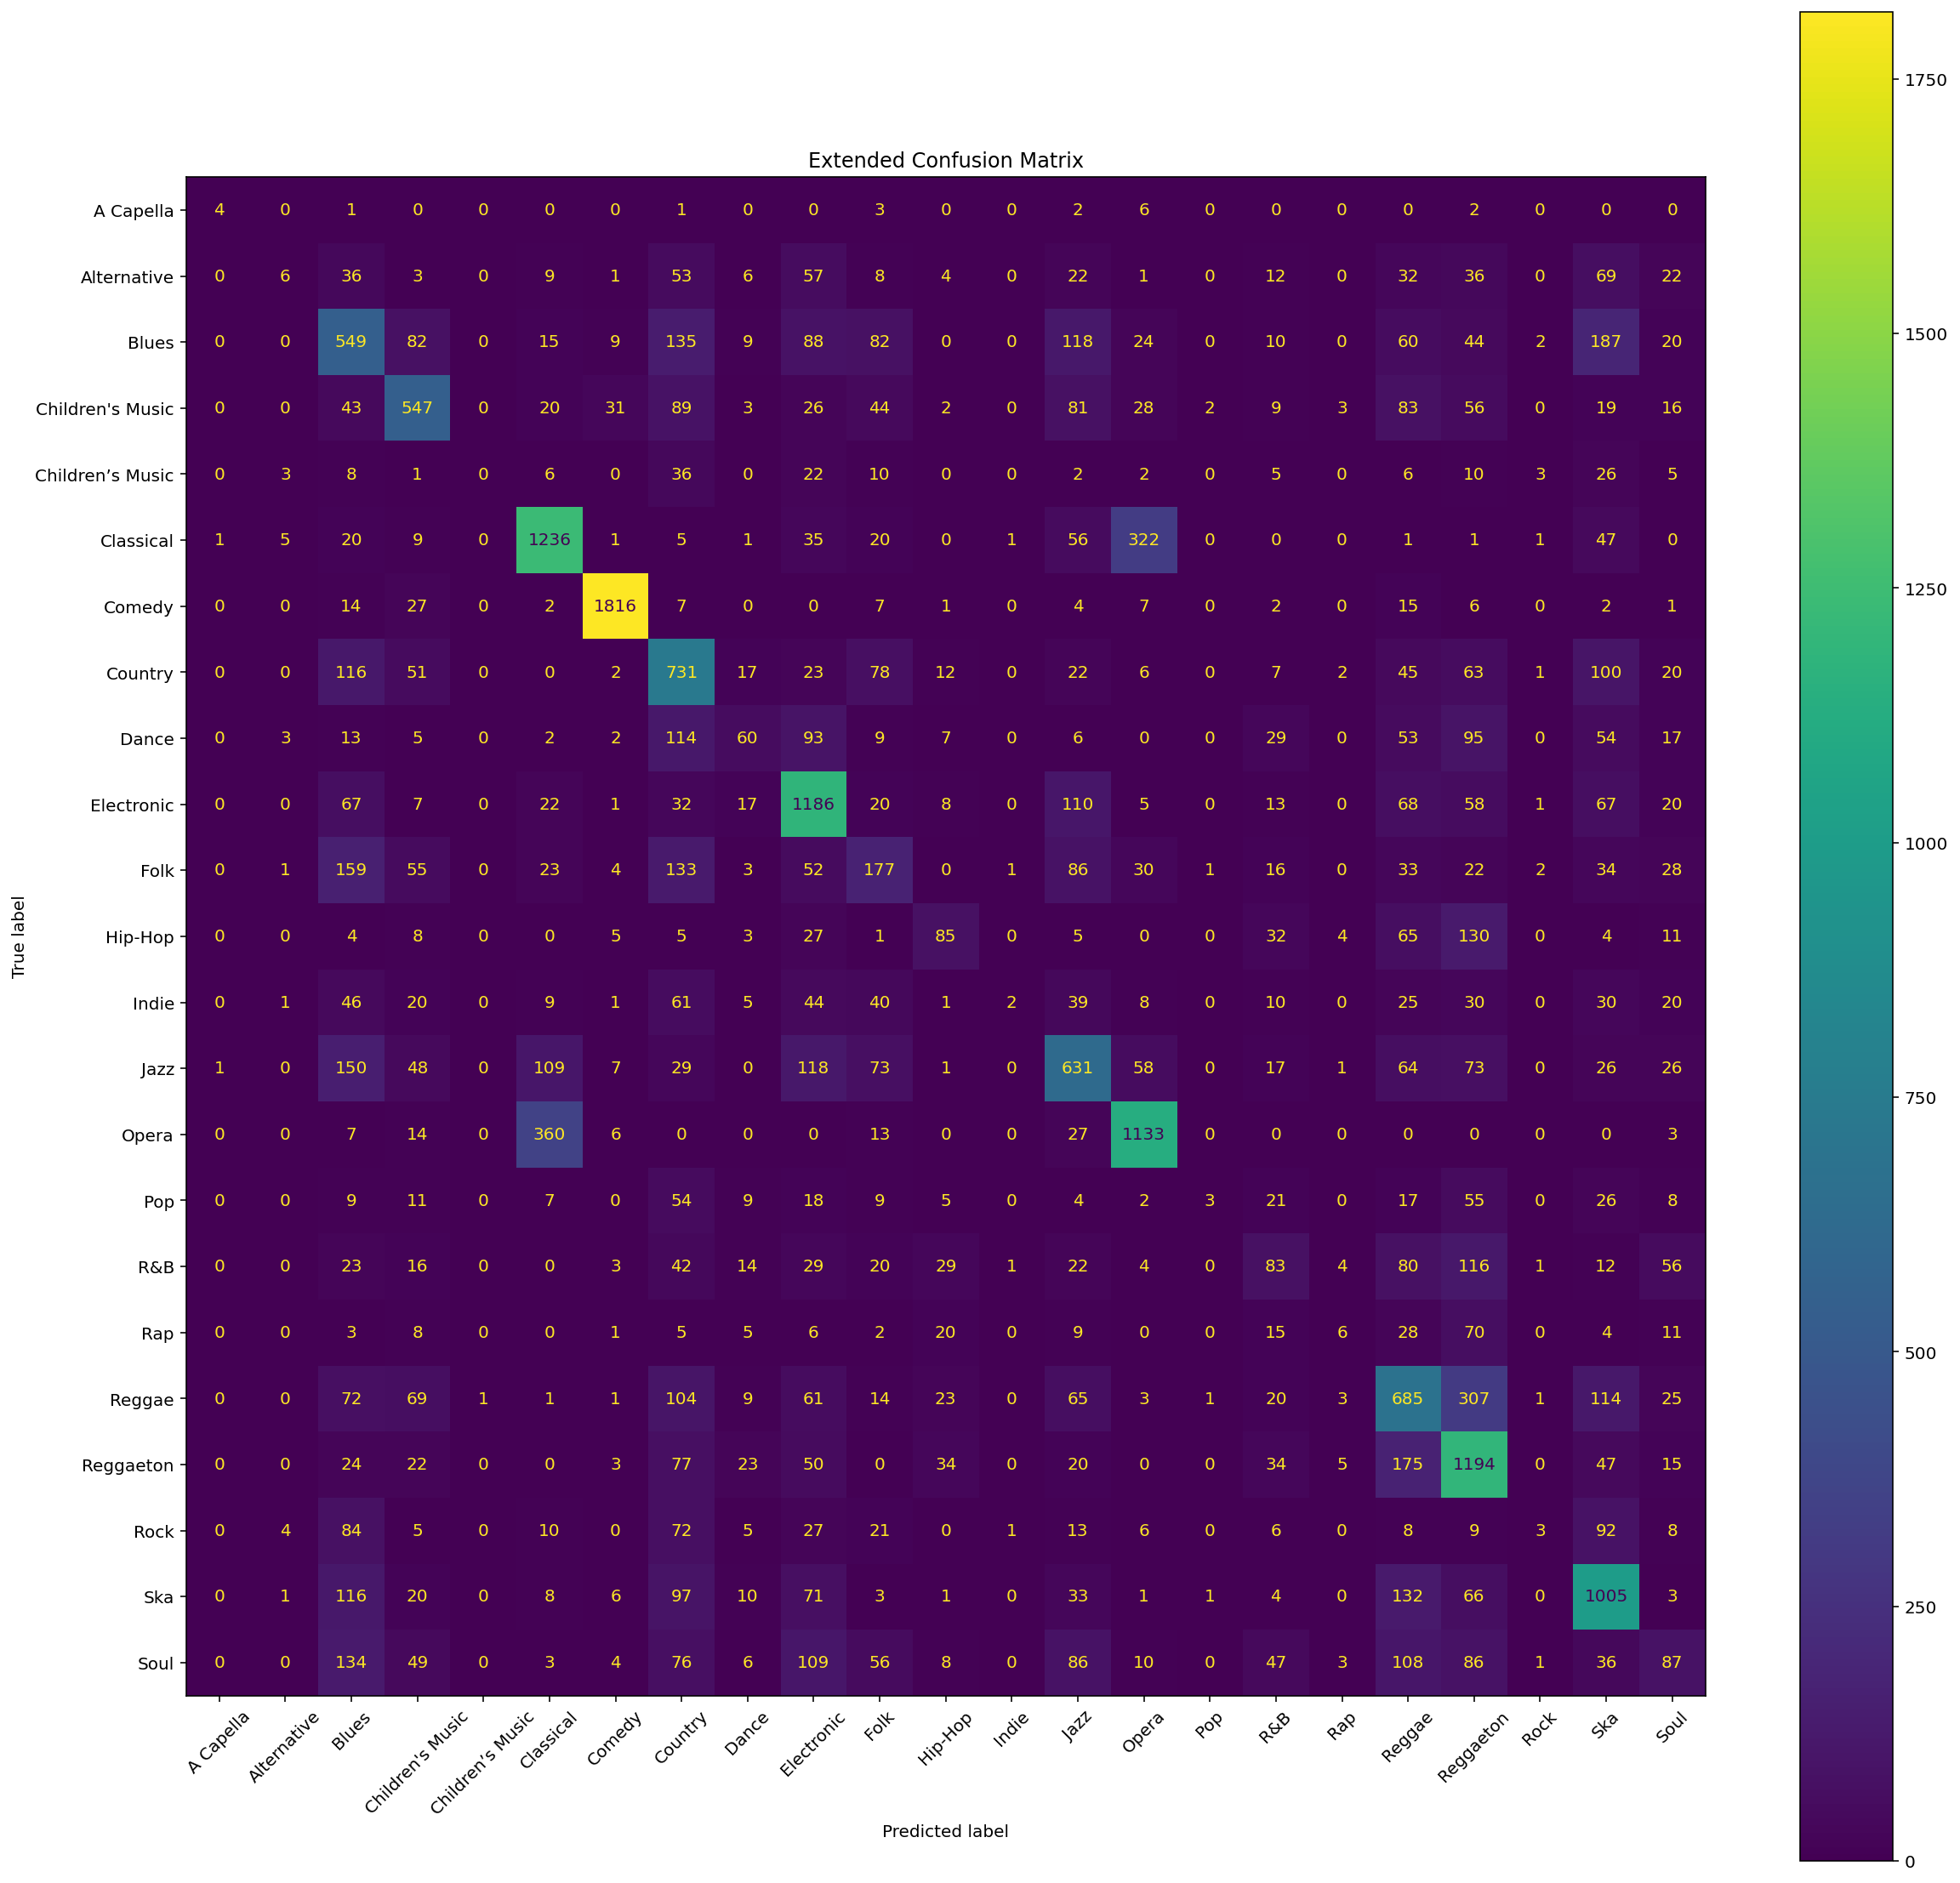

In [ ]:
label = list(range(23))
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
fig, ax = plt.subplots(figsize=(20,20))
plot = plot_confusion_matrix(model,
                             X_test, 
                             y_test_enc,
                             ax=ax,
                             display_labels=labelencodermap,
                             normalize=None)
plt.xticks(rotation=45)
plot.ax_.set_title('Extended Confusion Matrix')

Feature[0]:acousticness, Score: 0.1323
Feature[1]:danceability, Score: 0.1019
Feature[2]:energy, Score: 0.0888
Feature[3]:instrumentalness, Score: 0.1132
Feature[4]:key, Score: 0.0232
Feature[5]:liveness, Score: 0.0278
Feature[6]:loudness, Score: 0.1107
Feature[7]:mode, Score: 0.0622
Feature[8]:speechiness, Score: 0.2094
Feature[9]:tempo, Score: 0.0445
Feature[10]:time_signature, Score: 0.0260
Feature[11]:valence, Score: 0.0602


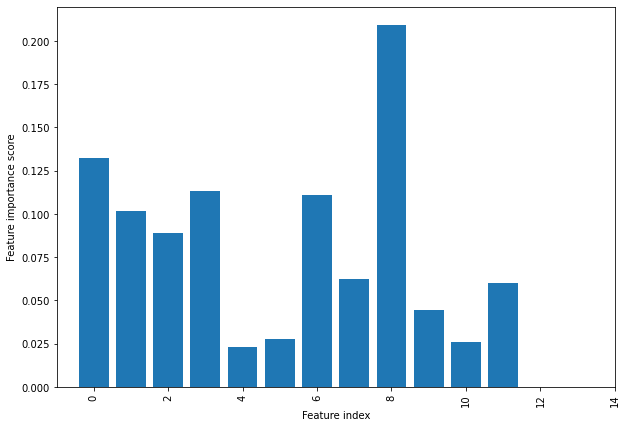

In [ ]:
importance = model.named_steps['xgbclassifier'].feature_importances_

for i,v in enumerate(importance):
    print('Feature[%0d]:%s, Score: %.4f' % (i,X_test.columns[i],v))
    
plt.subplots(figsize=(10,7))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature index')
plt.ylabel('Feature importance score')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(df.columns)-2, 2.0))
plt.show()

> **‚è≠ EDA Result**<br>
[Ïó¨Í∏∞](https://xgboost.readthedocs.io/en/latest/python/python_api.html) Ïóê Îî∞Î•¥Î©¥ Multi-class classificationÏùò feature importanceÎäî <br>Í∞Å targetÎßàÎã§ ÏñªÍ≤åÎêòÎäî feature importanceÏùò ÌèâÍ∑†ÏúºÎ°ú Î∞òÌôòÎê®.<br>
Ï¶â ÌÉÄÍ≤ü Î∂ÑÎ•òÏóê ÏûàÏñ¥ÏÑú Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ ÌäπÏÑ±ÏùÄ <br>
<U>**Feature[8] : speechiness, Score: 0.2116**</U> **'speechiness'** ÌäπÏÑ±Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏùå.<br>
Ïù¥ÌõÑ **acousticness, instrumentalness, loudness** Ïàú

## **Q4. ‚ö°Generalization‚ö°**
 **<h4><b> Îëê PublisherÏùò ÏÑ†Ìò∏Ïû•Î•¥Îäî ÏäàÌåÖ, Ïï°ÏÖò, Ïä§Ìè¨Ï∏†Ïù¥Î©∞ Í≥µÌÜµÏ†ÅÏúºÎ°ú ÏäàÌåÖÍ≤åÏûÑÏùÑ ÏÑ†Ìò∏ÌïúÎã§.</b></h4>**

# **Part 3. Questions & Insight**

<img width='500' src='https://storylytics.ca/wp-content/uploads/2020/12/define-insight.png'>

## **2-1. Questions & Insight**

`business questions:`
- **Q1. ÏùåÏõêÏùò Ïñ¥Îñ§ ÏÑ±Î∂ÑÏù¥ Ïû•Î•¥Î•º Í≤∞Ï†ïÏßìÎäîÍ∞Ä** <br>


> **A1.**<br>
ÌäπÏÑ±Ï§ëÏöîÎèÑÏóê Îî∞Î•¥Î©¥,
**</U>'speechiness'** Í∞ÄÏû• Ï§ëÏöîÌïú ÏÑ±Î∂ÑÏùÄ ÌäπÏÑ±Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏùå.<br>
Ïù¥ÌõÑ **acousticness, instrumentalness, loudness** ÏàúÏúºÎ°ú
 ÎåÄÏ≤¥Î°ú Ï∂îÏÉÅÏ†ÅÏù¥ÏßÄÏïäÍ≥† <br>ÏàòÏπòÌôî ÏãúÌÇ¨ Ïàò ÏûàÎäî ÏùåÏïÖÏ†Å ÏöîÏÜåÎùºÎäî Ï†êÏóêÏÑú ÏùåÏïÖÏ†Å ÏÑ±Î∂ÑÏóê Îî∞Îùº Ïû•Î•¥Î•º Î∂ÑÎ•òÌï† Ïàò ÏûàÎã§Í≥† Ìï† Ïàò ÏûàÏùå.<br>
 
 >**Reference**<br>
 speechiness(Î≥¥Ïª¨ÏÑ∏ÏÖòÏùò Ï∞∏Ïó¨ÏãúÍ∞Ñ)<br>
 acousticness(Ï†ÑÏûêÏùåÌñ•Ïù¥ Ï†ÅÏùÄ Ï†ïÎèÑ)<br>
 instrumentalness(Î≥¥Ïª¨Ïùò ÏùåÎüâÎπÑÏ§ë)<br>
 loudness(Í≥°Ïùò ÏùåÎüâ dB(Îç∞ÏãúÎ≤®)) 

- **Q2. ÏùåÏõêÏùò ÌäπÏÑ±ÏúºÎ°ú Ïû•Î•¥Î•º Ï†úÎåÄÎ°ú Î∂ÑÎ•òÌï† Ïàò ÏûàÎäîÍ∞Ä?**<br>
  - ÏÇ¨ÎûåÏù¥ Íµ¨Î∂ÑÌïú Ïû•Î•¥Ïóê Í∏∞Ï§ÄÏùÑ Îß§Í∏∏ Ïàò ÏûàÏùÑÍπå? ‚≠ï<br>
  - Ïû•Î•¥ÏôÄ ÏùåÏïÖÏÑ±Î∂ÑÏùÑ Í∏∞Î∞òÏúºÎ°ú Î∂ÑÎ•òÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Íµ∞ÏßëÎèÑÍ∞Ä Ïú†ÏÇ¨ÌïúÍ∞Ä? <br>

> **A2.**<br>
23Í∞úÏùò ÎùºÎ≤®Ïóê ÎåÄÌï¥ Í∏∞Ï§ÄÎ™®Îç∏(baseline)Ïùò F1Ïä§ÏΩîÏñ¥Í∞Ä 0.09Î°ú, XGBoost Î™®Îç∏Ïùò F1Ïä§ÏΩîÏñ¥Í∞Ä 0.51Ïù¥ ÎÇòÏôîÏùå.<br>
F1 Ïä§ÏΩîÏñ¥Îäî Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÎ•†Ïùò Ï°∞ÌôîÌèâÍ∑†ÏúºÎ°ú ÎÇòÏò§Îäî Ï†êÏàòÏù∏ÎßåÌÅº, Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÎ•† ÎëòÎã§ ÎÜíÏùÄÌé∏ÏúºÎ°ú, <br>ÎπÑÌä∏ÎßµÏúºÎ°ú Íµ¨ÌòÑÎêú ÌôïÏû•ÌòºÎèôÌñâÎ†¨ÏÉÅÏúºÎ°ú Î≥¥Í∏∞ÏóêÎèÑ ÏùºÎ∂Ä ÌÉÄÍ≤üÏùÑ Ï†úÏô∏ÌïòÎ©¥ ÍΩ§ ÎÜíÏùÄ ÎπÑÏú®Î°ú Î∂ÑÎ•òÎêòÍ≥† ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏùå.

> **add**<br>
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ ÏΩîÏÇ¨Ïù∏Ïú†ÏÇ¨ÎèÑÎ°ú Ïû•Î•¥Î•º Î∂ÑÎ•òÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† Í∏∞Ï§ÄÎ™®Îç∏Î°ú ÏÇºÏïÑÏÑú ÎπÑÍµêÌïòÎ†§ÌñàÏúºÎÇò <br>Ïó¨Îü¨Í∞ÄÏßÄ ÏãúÌñâÏ∞©Ïò§ ÎïåÎ¨∏Ïóê ÏãúÍ∞ÑÏù¥ ÏóÜÏñ¥ÏÑú ÏãúÎèÑÌïòÏßÄÎ™ªÌñàÏùå.

- **Q3. ÏùåÏõêÏ∂îÏ≤ú**<br>
  - ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ(ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ)ÏôÄ Ïû•Î•¥Î•º ÌÜµÌïú ÏùåÏõêÏ∂îÏ≤ú 

> **A3.**<br>
ÏãúÍ∞ÑÏù¥ ÏóÜÏñ¥ÏÑú ÏãúÎèÑÌïòÏßÄÎ™ªÌñàÏùå.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## **0. Reflection and Feedback**

<img width='500' src='https://tbc.imgdl.xcache.kinxcdn.com/cdn001/20191205/60933532_1206_peng_2.jpg'>

# **Points**
####**1. ÏãúÍ∞ÑÏ†úÌïú ÏûàÎäî ÌîÑÎ°úÏ†ùÌä∏Ïóê ÏïàÎ∞∞Ïö¥Í±∞ ÏãúÎèÑÌïòÏßÄ ÎßêÏûê**
####**2. Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Í≥† Í∞ÄÍ≥µÌïòÎ†§Í≥† Ïï†Ïì∞ÏßÄÎßàÎùº. Îç∞Ïù¥ÌÑ∞Îäî Ï∞æÏïÑÎ≥¥Î©¥ Îã§ ÏûàÎã§.**

> **üîß this project**<br>
‚Üí XGBÏóê class_weightÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏùå.<br>
(Ïù¥ÏßÑÎ∂ÑÎ•òÏóêÎßå ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§Îäî Í∏ÄÏù¥ ÎßéÏù¥ ÎÇòÏò¥)<br>
‚Üí Í∏∞Ï§ÄÎ™®Îç∏ÏùÑ Ï†ÅÏñ¥ÎèÑ Í∏∞Î≥∏Ï†ÅÏù∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏùòÎØ∏ÏûàÎäî ÏàòÏ§ÄÏùò scoreÎ•º ÎÉàÏñ¥Ïïº ÌñàÏóàÏßÄÏïäÎÇò.<br>
‚Üí eli5.show_weightsÎ•º Í∞Å labelÎ≥Ñ feature importanceÍ∞Ä ÎÇòÏò§ÎèÑÎ°ù ÏÑ§Ï†ïÌïòÎäîÍ≤ÉÏóêÏÑú Î¨∏Ï†úÎ•º Í≤™Ïùå<br>
  (Í≤ÄÏÉâÌï¥Î≥¥Îãà Î∞©Î≤ïÏùÄ ÏûàÎäî Í≤É Í∞ôÏùÄÎç∞ Î¨¥ÏàòÌûà ÎßéÏùÄ Ïò§Î•òÍ∞Ä Î∞òÍ≤®Ï§å<br>
‚Üí PDP/ICE Plot Î™ªÍ∑∏Î†§Î¥Ñ. Î©ÄÌã∞ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÎ¨∏Ï†ú(Ï†Ñ ÌäπÏÑ±/ÌÉÄÍ≤üÎ≥Ñ)ÏóêÏÑú probaÎ•º ÏßÄÏõêÌïòÏßÄÏïäÏùå. <br>(ÏïÑÎßà Í≤∞Í≥ºÎ•º ÌäúÌîåÌòïÏãùÏúºÎ°ú Î∞òÌôòÌïòÎäîÍ≤å ÏïÑÎãêÍ±∞Í∞ôÎã§Îäî ÏÉùÍ∞Å. Î©ÄÌã∞ÌÉÄÍ≤üÎ∂ÑÎ•òÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï¢ÄÎçî Í≥µÎ∂ÄÌïòÍ≥†ÎÇòÏÑú Ïç®ÏïºÌï† Í≤É Í∞ôÏùå)<br>
‚Üí keras library, Softmax RegressionÏùÑ Î∞∞Ïö∞Í≥† ÎÇú ÌõÑ Îã§Ï§ëÌÉÄÍ≤üÏúºÎ°ú Ï†ÅÏö©Ìï¥Î≥¥Í∏∞<br>
‚Üí ÌÉÄÍ≤üÏùÑ Ïó¨Îü¨Í∞ú Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞(Ïù¥Î≤àÏóê Î™ªÏç®Î≥∏) Î∂ÑÏÑù Îã§ÏùåÏóê Íº≠ Ìï¥Î≥¥Í∏∞<br>

> **üîß next project**<br>
‚Üí ‚óãÎçî ÎßéÏùÄ ÏùåÏõêÎç∞Ïù¥ÌÑ∞ ÌöçÎìù ÌïÑÏöîÏÑ± Ï≤¥Í∞ê(2100Í≥°ÏùÄ ÎÑàÎ¨¥ Ï†ÅÎã§)<br>
‚Üí ‚óãÌÅ¨Î°§ÎßÅ Ï†úÎåÄÎ°ú Î∞∞ÏõåÏÑú Íº≠ ÌÉÄÍ≤ü Ï±ÑÏõåÎ≥¥Í∏∞<br>
‚Üí ‚óãÌèâÍ∑†, Î∂ÑÏÇ∞ Ïô∏ÏóêÎèÑ Îã§ÏñëÌïú Î∞©Î≤ïÏúºÎ°ú ÌååÌòï ÌäπÏÑ±Ï∂îÏ∂ú ÏãúÎèÑ ÌïÑÏöî<br>(ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Îäî ÎÑàÎ¨¥ Îã®Ï°∞Î°úÏö¥ ÌäπÏÑ±Ï∂îÏ∂úÏûÑ)<br>
‚Üí ‚óãÌäπÏÑ±Ï∂îÏ∂úÏ§ë Ï∞®ÏõêÏùÑ Ï§ÑÏù¥Îäî Í≥ºÏ†ï(magnitude, scale, phase 3Ï∞®Ïõê ÌååÌòïÏóêÏÑú Îã®ÏùºÍ∞í(1dim)+Î∂ÑÏÇ∞ÏúºÎ°ú Ï∂ïÏÜå)ÏóêÏÑú ÎßéÏùÄ ÌååÌòïÌäπÏÑ±ÏùÑ ÏûÉÏùå. ÌååÌòïÌäπÏÑ±ÏùÑ ÏµúÎåÄÌïú Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥ librosa library Ìï®ÏàòÎì§ÏùÑ Îçî Í≥µÎ∂ÄÌï† ÌïÑÏöî ÏûàÏùå